## Waste Management Using CNN model

In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [1]:
#Importing necessaru libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_path="/Users/rakeshreddy/Desktop/waste classification/dataset/dataset1/DATASET/DATASET/TRAIN"
test_path="/Users/rakeshreddy/Desktop/waste classification/dataset/dataset1/DATASET/DATASET/TEST"

In [3]:
#Importing Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Activation,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [4]:
#Visualisation
from cv2 import cvtColor
x_data= []
y_data= []
for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array=cv2.imread(file)
        img_array=cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
data=pd.DataFrame({'image':x_data, 'label':y_data})

100%|██████████| 12565/12565 [00:05<00:00, 2095.87it/s]


In [5]:
data.shape

(22564, 2)

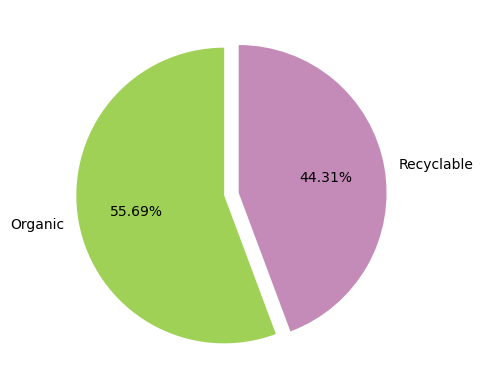

In [6]:
colors=['#a0d157','#c48bb8']
plt.pie(data.label.value_counts(),labels=['Organic','Recyclable'], autopct='%0.2f%%',colors=colors,startangle=90,explode=[0.05,0.05])
plt.show()

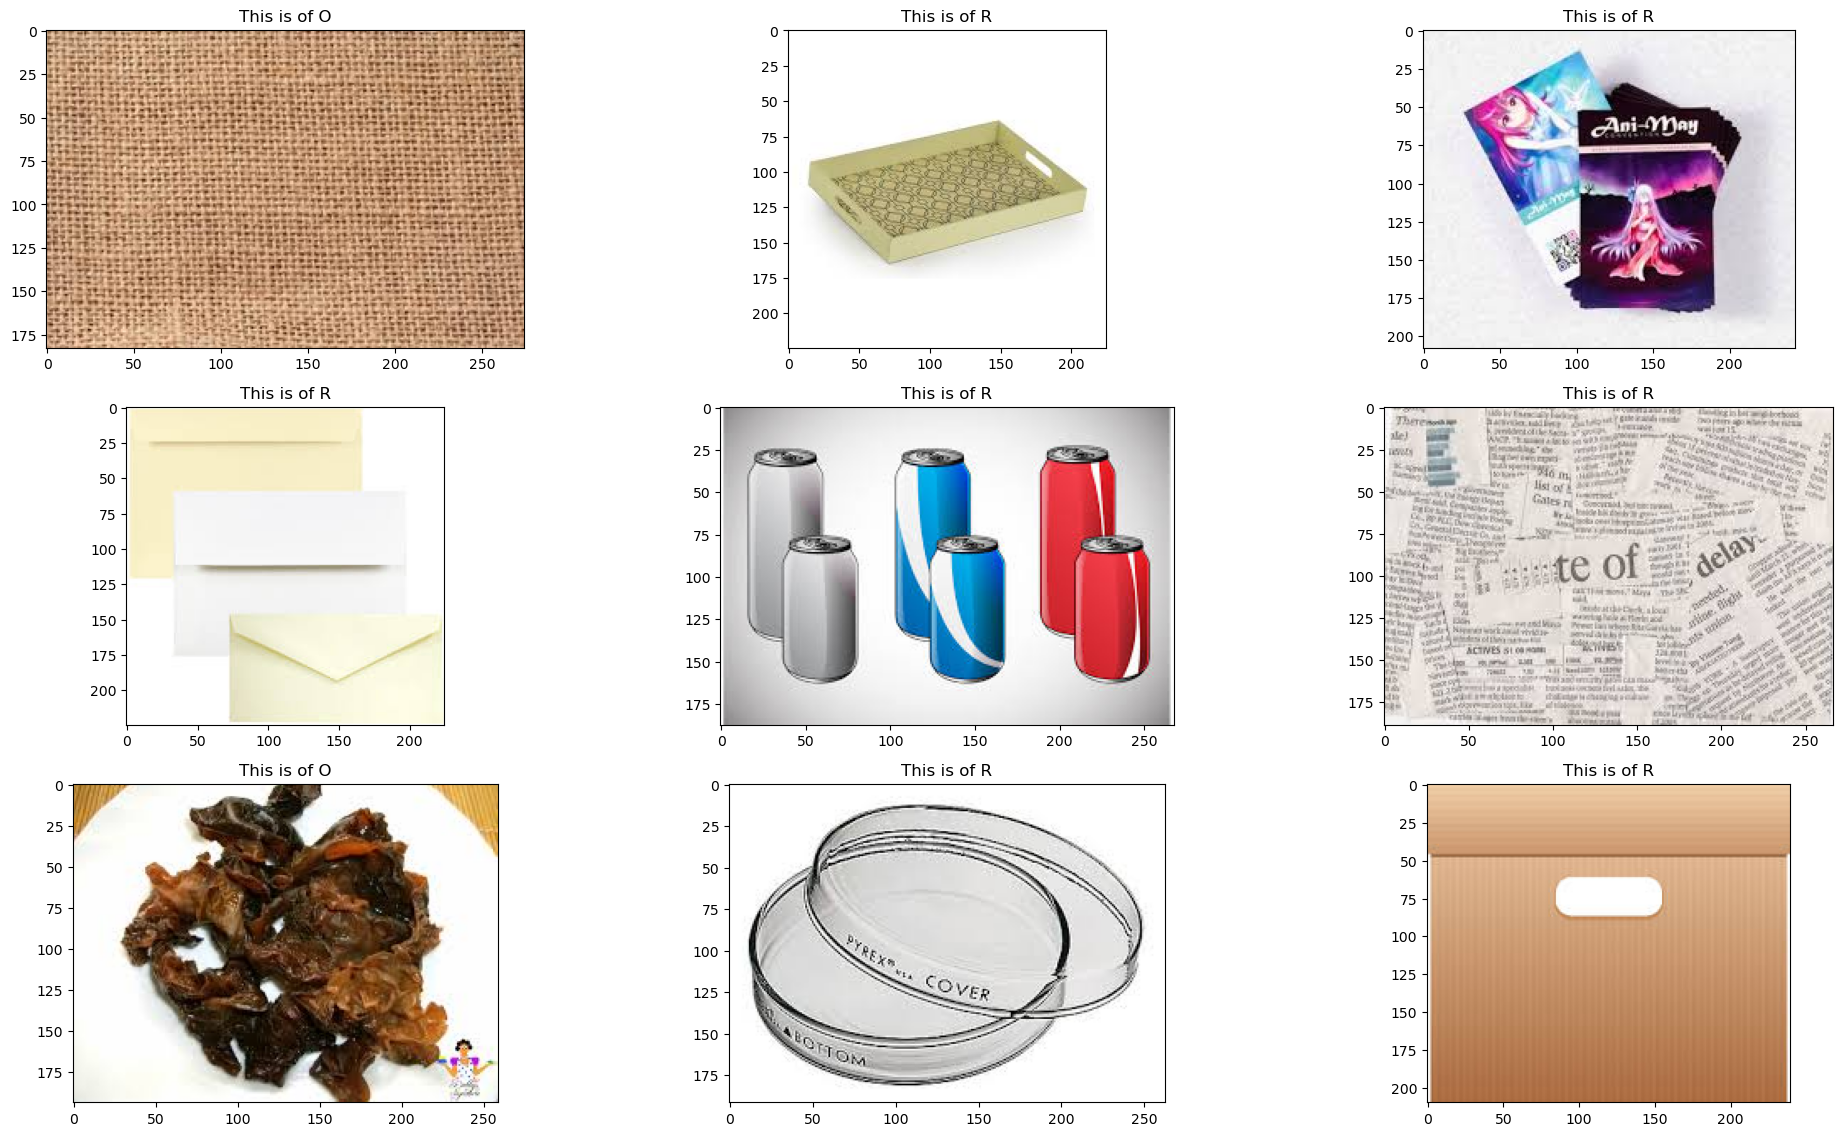

In [11]:
plt.figure(figsize=(20,15))
for i in range(9):
    plt.subplot(4,3,(i%12)+1)
    index=np.random.randint(15000)
    plt.title(f'This is of {data.label.iloc[index]}')  # Use .iloc to index the Series
    plt.imshow(data.image[index])
    plt.tight_layout()

## CNN-Convolutional Neural Network

In [16]:
model =Sequential()

model.add(Conv2D(32, (3,3), input_shape=(224,224,3) ))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3) ))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3,3) ))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss = "binary_crossentropy", optimizer ="adam" , metrics=["accuracy"])

batch_size=256

In [15]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_12 (Activation)      │ (None, 222, 222, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_13 (Activation)      │ (None, 109, 109, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_14 (Activation)      │ (None, 52, 52, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_15 (Activation)      │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_16 (Activation)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 2)              │           130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_17 (Activation)      │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,261,250 (84.92 MB)

 Trainable params: 22,261,250 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
train_datagen=ImageDataGenerator(rescale=1./255)

In [18]:
test_datagen=ImageDataGenerator(rescale=1./255)


In [19]:
train_generator=train_datagen.flow_from_directory(
    train_path,
    target_size=(224,224),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical")

test_generator=test_datagen.flow_from_directory(
    test_path,
    target_size=(224,224),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical")

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [22]:
hist=model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

Epoch 1/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 567s 6s/step - accuracy: 0.8277 - loss: 0.4042 - val_accuracy: 0.8559 - val_loss: 0.3431
Epoch 2/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 582s 7s/step - accuracy: 0.8521 - loss: 0.3660 - val_accuracy: 0.8798 - val_loss: 0.3045
Epoch 3/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 668s 8s/step - accuracy: 0.8693 - loss: 0.3282 - val_accuracy: 0.8786 - val_loss: 0.3087
Epoch 4/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 571s 6s/step - accuracy: 0.8756 - loss: 0.3039 - val_accuracy: 0.8623 - val_loss: 0.3336
Epoch 5/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 528s 6s/step - accuracy: 0.8898 - loss: 0.2768 - val_accuracy: 0.8886 - val_loss: 0.2908
Epoch 6/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 543s 6s/step - accuracy: 0.9077 - loss: 0.2425 - val_accuracy: 0.8854 - val_loss: 0.3218
Epoch 7/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 903s 10s/step - accuracy: 0.9218 - loss: 0.1998 - val_accuracy: 0.8890 - val_loss: 0.3546
Epoch 8/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 658s 7s/step - accuracy: 0.9414 - loss: 0.1605 - val_accuracy: 0.8961 - 